#### Imports

In [1]:
from scipy.stats import norm
import scipy.special as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Q8) For $\mathcal{X} = [a, b]$, what change of variable should be applied to the nodes $x_i$ ?

Gaussian-Legendre method (the library scipy doesn't put constant infront of the integral) :
$$\int_{-1}^1 f(x)\,dx \approx \sum_{i=1}^n w_i f(x_i)$$
$$ \int_{a}^b f(x)\,dx = \frac{b-a}{2}\int_{-1}^{1} f(u*\frac{b-a}{2}+\frac{b+a}{2})\,du \approx \frac{b-a}{2}\sum_{i=1}^n w_i f(x_i*\frac{b-a}{2}+\frac{b+a}{2}) $$

The change of variable is $\phi :x_i \rightarrow x_i*\frac{b-a}{2}+\frac{b+a}{2} $

We also know that the weights doesn't depends on (a,b) (cf TD quadrature I).

So there is no need to change them when we modify the interval of integration

Q9) Implement a function def gauss_legendre_simple(f, a, b, nodes, weights) that approximates the integral of a function f over $[a, b]$ using the Gaussian-Quadrature rule. Test your implementation on some analytically integrable function of your choice.

In [2]:
def gauss_legendre_simple(f, a, b, nodes, weights):
    n= len(nodes)-1
    res = 0
    h = (b-a)/2
    m = (b+a)/2
    for i in range(n+1):
        res += weights[i]*f(nodes[i]*h +m)
    return h*res

In [3]:
#We test our approxiamtion on x-> x^3 
roots, weights = sp.roots_legendre(2) #n=1
estimation = gauss_legendre_simple(lambda x: x**3 , -2, 10, roots, weights) #Polynome of degree 3 (=2*1 + 1)
real_value = (10**4 -2**4)/4
print("Approxiamation of the integral : ", estimation, ", real value of the integral : ", real_value)
print("Error : ", abs(estimation-real_value))

Approxiamation of the integral :  2495.9999999999995 , real value of the integral :  2496.0
Error :  4.547473508864641e-13


Q10) Implement a function def gauss_legendre(f, n, M, a, b) that performs the composite rule of Gauss-Legendre over $M$ sub-intervals of $[a, b]$.


In [4]:
def gauss_legendre(f, n, M, a, b):
    h = (b-a)/M
    res = 0
    for i in range(M):
        r, w = sp.roots_legendre(n+1)
        res += gauss_legendre_simple(f, a+i*h, a+(i+1)*h, r, w)
    return res

In [5]:
M=4
n=1
res_mqc = gauss_legendre(lambda x:x**3, n, M, 0, 10)
res_mqs = gauss_legendre_simple(lambda x:x**3, 0, 10, sp.roots_legendre(n+1)[0], sp.roots_legendre(n+1)[1])
real = 10**4/4
print("Approxiamation with MQC (n=",n,", M =",M,") : ", res_mqc, "\nApproxiamation with MQS (n=",n,") : ", res_mqs ,"\nreal value of the integral : ", real_value)

Approxiamation with MQC (n= 1 , M = 4 ) :  2500.0 
Approxiamation with MQS (n= 1 ) :  2500.0000000000005 
real value of the integral :  2496.0


Q11) Write an identical function but with a vectorized implementation gauss_legendre_vectorized(f,n, M, a, b) with numpy (does not contain any loop or list comprehensions. Hint : it should not call gauss_legendre_simple).


In [6]:
def change_base(x,a,b):
    return x*(b-a)/2 + (b+a)/2

In [7]:
def gauss_legendre_vectorized(f, n, M, a, b):
    r, w = sp.roots_legendre(n+1)
    interval = np.linspace(a,b,M+1)
    modified_r = change_base(r[:,np.newaxis],interval[:-1],interval[1:]).T
    return (f(modified_r)*w*(b-a)/(2*M)).sum()

In [8]:
M=3; n1=1; n2 = 3
res_mqc = gauss_legendre_vectorized(lambda x:x**3, n1, M, 0, 10)
res_mqs = gauss_legendre_simple(lambda x:x**3, 0, 10, sp.roots_legendre(n2+1)[0], sp.roots_legendre(n2+1)[1])
real = 10**4/4
print("Approxiamation with MQC vect (n=",n1,", M =",M,") : ", res_mqc, "\nApproxiamation with MQS (n=",n2,") : ", res_mqs ,"\nreal value of the integral : ", real_value)

Approxiamation with MQC vect (n= 1 , M = 3 ) :  2500.0000000000005 
Approxiamation with MQS (n= 3 ) :  2500.0000000000005 
real value of the integral :  2496.0


Q12) Visualize in one plot the integration error of $\int_{2}^{5} \frac{1}{x}$ as a function of both $n$ and $M$

In [9]:
def g(x):return 1/x

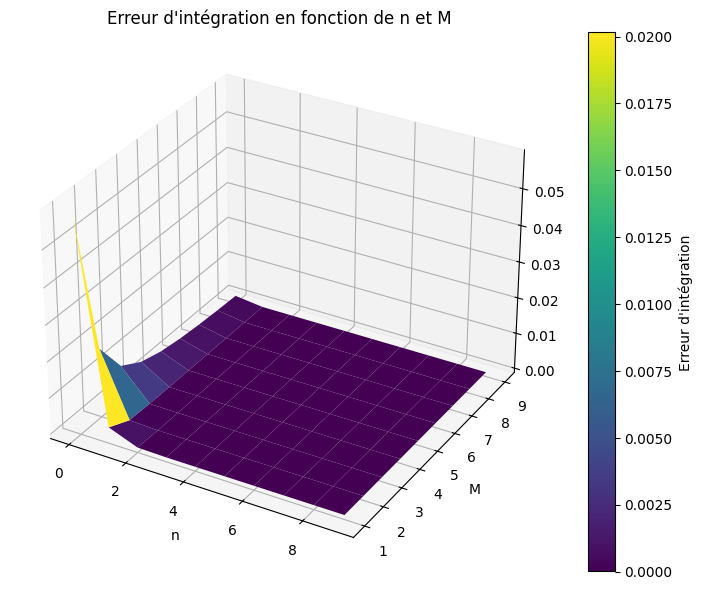

In [10]:
real_val = np.log(5)-np.log(2)
ns = np.arange(0,10,1)
Ms = np.arange(1,10,1)

X, Y = np.meshgrid(ns, Ms)

# Calculer les valeurs de f(x, y) pour chaque paire (x, y)
Z = np.zeros((len(Ms),len(ns)))
for i in range(len(Ms)):
    for j in range(len(ns)):
        Z[i, j] = gauss_legendre_vectorized(g, X[i, j], Y[i, j], 2, 5)

Z= abs(real_val-Z)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Créer une grille de points (n, M)
N, M = np.meshgrid(ns, Ms)

# Tracer la surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surf, label='Erreur d\'intégration')
ax.set_xlabel('n')
ax.set_ylabel('M')
plt.title('Erreur d\'intégration en fonction de n et M')  
plt.show()


Q13) Write a function def trapezoidal that computes the composite trapezoidal rule of Ex 1. Compare
the integration error with the Gauss-Legendre method with the same values of M and the number
of nodes. What do you conclude ?

In [11]:
def trapezoidal(f, M, a, b):
    h = (b-a)/M
    A = np.linspace(a,b,M+1)
    return 0.5*h*(f(a) + f(b) + 2*f(A[1:-1]).sum())

In [12]:
#We test our approxiamtion on x-> x^3 
M=10
estimation = trapezoidal(lambda x:x**3, M, 2, 10) 
real_value = (10**4 -2**4)/4
print("Approxiamation of the integral with M =", M," : ", estimation, "\nReal value of the integral : ", real_value)
print("Error : ", abs(estimation-real_value))

Approxiamation of the integral with M = 10  :  2511.3600000000006 
Real value of the integral :  2496.0
Error :  15.360000000000582


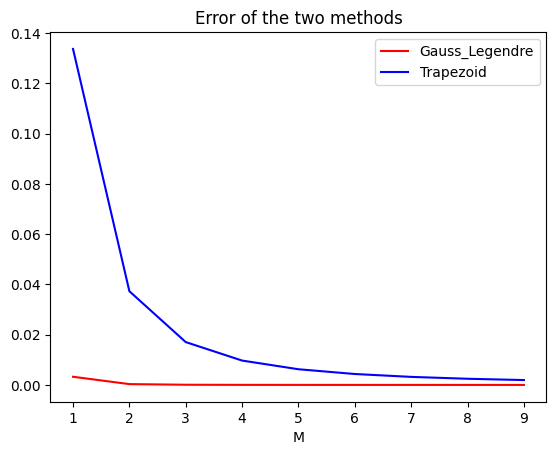

In [13]:
real_val = np.log(5)-np.log(2)
n = 1 #Trapezoid method has two nodes
Ms = np.arange(1,10,1)

Y_trap = np.array([trapezoidal(g,m,2,5) for m in Ms])
Z_trap = abs(real_val - Y_trap)

Y_GL = np.array([gauss_legendre_vectorized(g, n, m, 2, 5) for m in Ms])
Z_GL = abs(real_val - Y_GL)

plt.plot(Ms, Z_GL, color = 'r', label = "Gauss_Legendre")
plt.plot(Ms, Z_trap, color = 'b', label = "Trapezoid")
plt.title("Error of the two methods")
plt.xlabel("M")
plt.legend()
plt.show()

We can conclude that Gauss-Lagrange method is more precise than the trapezoid method with the same number of sub-interval and that it converges faster to the real value when $ M \xrightarrow{lim} \infty $.

Q14) Mini-project Implement different Gauss-quadrature rules (different set of nodes i.e different space
$ \mathcal{X} $ ) that approximate the probability $P(X ≤ a)$ for a Gaussian random variable $X \backsim \mathcal{N} (0, 1)$ and
some $a ∈ R$. Evaluate the accuracy of your approximation (as a function of n) using scipy.stats.norm.cdf.
Which rule is more accurate and why ?


    1) Gauss-Hermite

$$\int_{-\infty}^{+\infty} e^{-x^2} f(x)\,dx \approx \sum_{i=0}^n w_i f(x_i) $$
En effectuant le changement de variable $ u = x\sqrt{2}$ on obtient :
$$ \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{+\infty} e^{\frac{-u^2}{2}} f(\frac{u}{\sqrt{2}})\,du \approx \frac{1}{\sqrt{\pi}} \sum_{i=0}^n w_i f(\frac{x_i}{\sqrt{2}})$$

En posant $f : x \rightarrow \mathcal{1}_{x<a}$ on obtient la fonction de distribution de $X \backsim \mathcal{N} (0, 1)$ évalué en $a$.

In [14]:
def change_variable(x): return x/np.sqrt(2)

In [15]:
def gauss_Hermite(f, n):
    r, w = sp.roots_hermite(n+1)
    return np.sum([w[i] * f(r[i]) for i in range(len(r))])/np.sqrt(np.pi)

def f_herm(x,a):
    return (x<a)*1

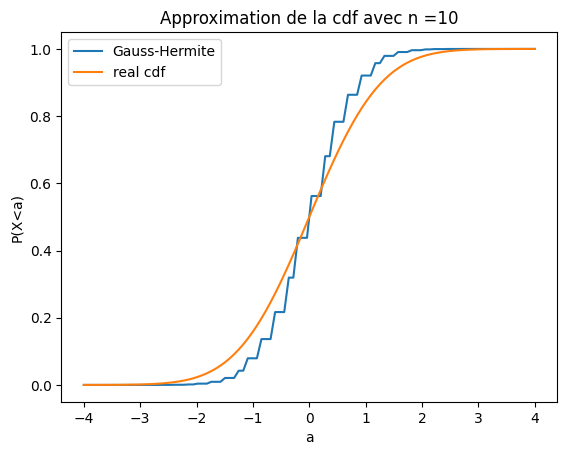

In [16]:
n= 10
X = np.linspace(-4, 4, 100)
Y_Her=[gauss_Hermite(lambda z:f_herm(z,i), 100) for i in X]
plt.plot(X, Y_Her, label='Gauss-Hermite')
plt.plot(X, norm.cdf(X), label = "real cdf")
plt.xlabel("a")
plt.ylabel("P(X<a)")
plt.title('Approximation de la cdf avec n =' + str(n))  
plt.legend()
plt.show()

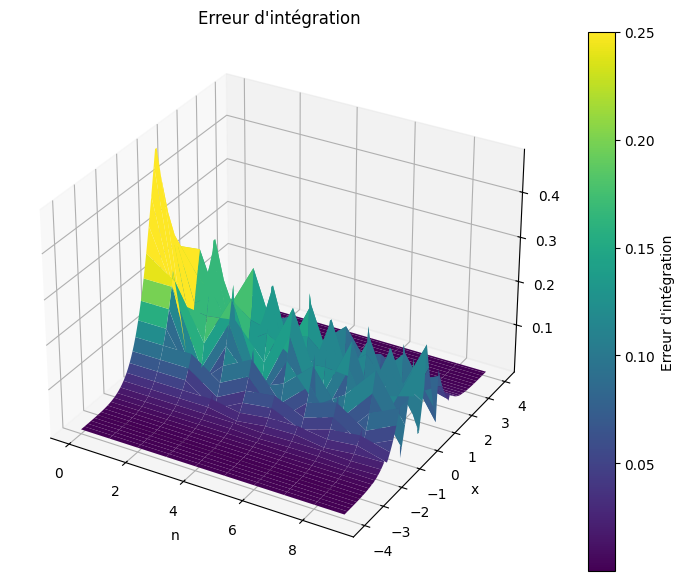

In [17]:
ns = np.arange(0,10,1)
A = np.linspace(-4,4,100)

X, Y = np.meshgrid(ns, A)
# Calculer les valeurs de f(x, y) pour chaque paire (x, y)
Z = np.zeros((len(A),len(ns)))
for i in range(len(A)):
    for j in range(len(ns)):
        Z[i, j] = abs(norm.cdf(Y[i,j])-gauss_Hermite(lambda z : f_herm(z,Y[i, j]), X[i, j]))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


# Tracer la surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surf, label='Erreur d\'intégration')
ax.set_xlabel('n')
ax.set_ylabel('x')
plt.title('Erreur d\'intégration')  
plt.show()

    2. Gauss-Laguerre

$$\frac{1}{\sqrt{2\pi}} \int_{-\infty}^{a} e^{-\frac{x^2}{2}} dx= \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{0} e^{-\frac{(x+a)^2}{2}} dx =\frac{1}{\sqrt{2\pi}} \int_{0}^{+\infty} e^{-\frac{(x-a)^2}{2}} dx = \frac{1}{\sqrt{2\pi}} \int_{0}^{+\infty} e^{-\frac{(x-a)^2}{2}+x}e^{-x} dx$$

En posant $f : x \rightarrow  \frac{1}{\sqrt{2\pi}}e^{-\frac{(x-a)^2}{2}+x}$ on peut simuler la fonction de distribution avec la méthode de Gauss-Laguerre.

In [18]:
def gauss_Laguerre(f, n):
    r, w = sp.roots_laguerre(n+1)
    return (w*f(r)).sum()

def f_lag(x,a):
    return np.exp(-0.5*(x-a)**2 + x)/np.sqrt(2*np.pi)

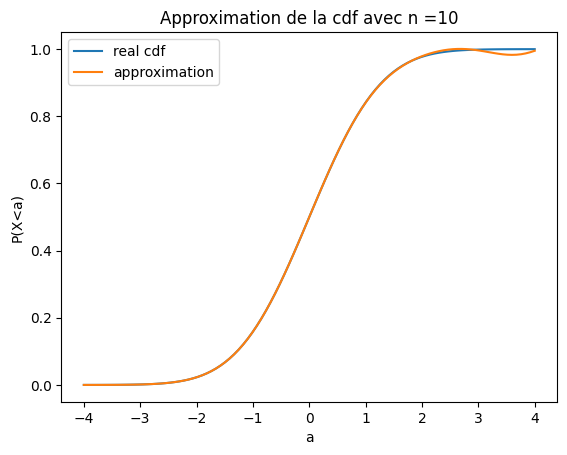

In [19]:
n= 10
X = np.linspace(-4, 4, 100)
Y_lag = np.array([gauss_Laguerre(lambda x : f_lag(x,a),n) for a in X])
plt.plot(X, norm.cdf(X), label = "real cdf")
plt.plot(X, Y_lag, label = "approximation")
plt.xlabel("a")
plt.ylabel("P(X<a)")
plt.title('Approximation de la cdf avec n =' + str(n))  
plt.legend()
plt.show()

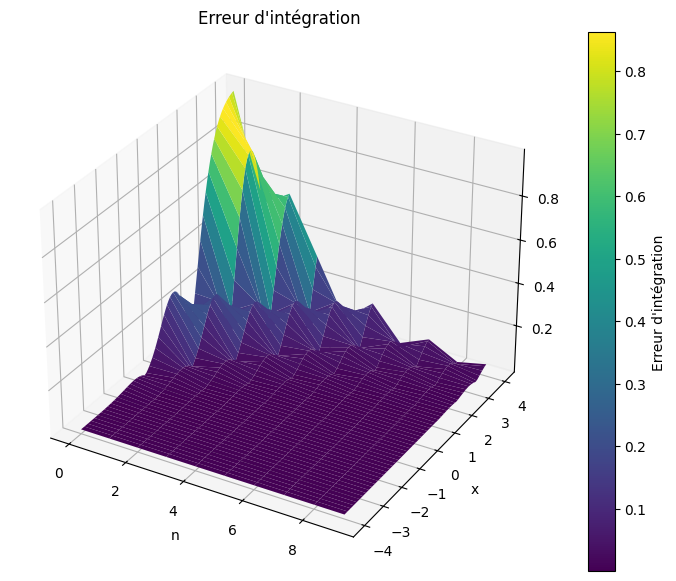

In [20]:
ns = np.arange(0,10,1)
A = np.linspace(-4,4,100)

X, Y = np.meshgrid(ns, A)

# Calculer les valeurs de f(x, y) pour chaque paire (x, y)
Z = np.zeros((len(A),len(ns)))
for i in range(len(A)):
    for j in range(len(ns)):
        Z[i, j] = abs(norm.cdf(Y[i,j])-gauss_Laguerre(lambda x : f_lag(x,Y[i, j]), X[i, j]))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


# Tracer la surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surf, label='Erreur d\'intégration')
ax.set_xlabel('n')
ax.set_ylabel('x')
plt.title('Erreur d\'intégration')  
plt.show()

    3. Gauss-Legendre

In [21]:
print("Probabilité que X soit plus petit que -4 : ", norm.cdf(-4))

Probabilité que X soit plus petit que -4 :  3.167124183311986e-05


On ne peut utiliser la méthode de quadrature de Gauss-Legendre que sur une fonction à support finie. 

Parce que $ P(X \leq -4) = P(X \geq 4) \approx 10^{-5} $ on fait l'approximation que $\frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} e^{-\frac{x^2}{2}} dx \approx \frac{1}{\sqrt{2\pi}} \int_{-4}^{4} e^{-\frac{x^2}{2}} dx$

$$\int_{-1}^1 f(x)\,dx \approx \sum_{i=1}^n w_i f(x_i)$$
$$ \int_{a}^b f(x)\,dx = \frac{b-a}{2}\int_{-1}^{1} f(u*\frac{b-a}{2}+\frac{b+a}{2})\,du \approx \frac{b-a}{2}\sum_{i=1}^n w_i f(x_i*\frac{b-a}{2}+\frac{b+a}{2}) $$

Dans ici on a $ \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{c} e^{-\frac{x^2}{2}} dx \approx \frac{c+4}{2\sqrt{2\pi}}\sum_{i=1}^n w_i f(x_i*\frac{c+4}{2}+\frac{c-4}{2}) $

In [22]:
def f_leg(x):
    return np.exp(-0.5*(x)**2)/np.sqrt(2*np.pi)

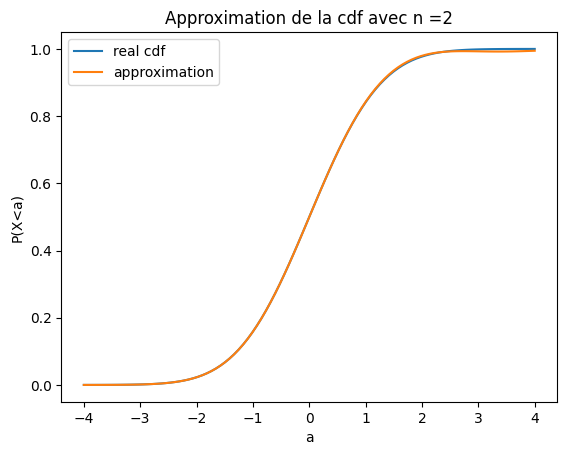

In [23]:
n= 2
M= 2
X = np.linspace(-4, 4, 100)
Y_leg = np.array([gauss_legendre_vectorized(f_leg,n,M, -4, a) for a in X])
plt.plot(X, norm.cdf(X), label = "real cdf")
plt.plot(X, Y_leg, label = "approximation")
plt.xlabel("a")
plt.ylabel("P(X<a)")
plt.title('Approximation de la cdf avec n =' + str(n))  
plt.legend()
plt.show()

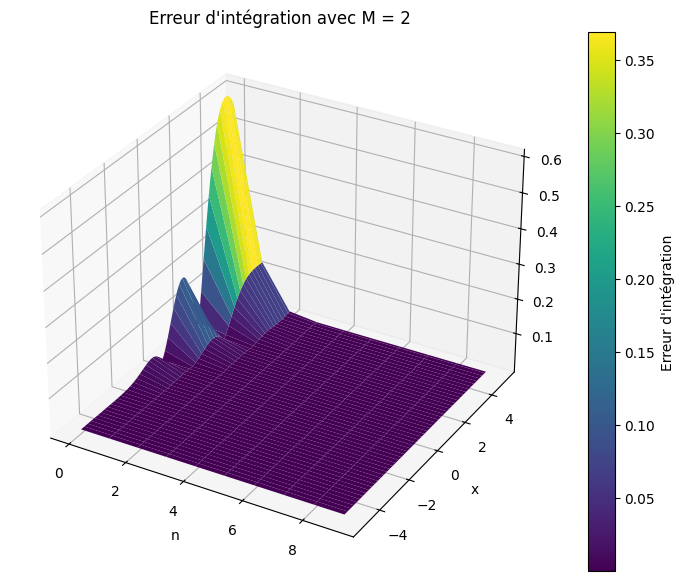

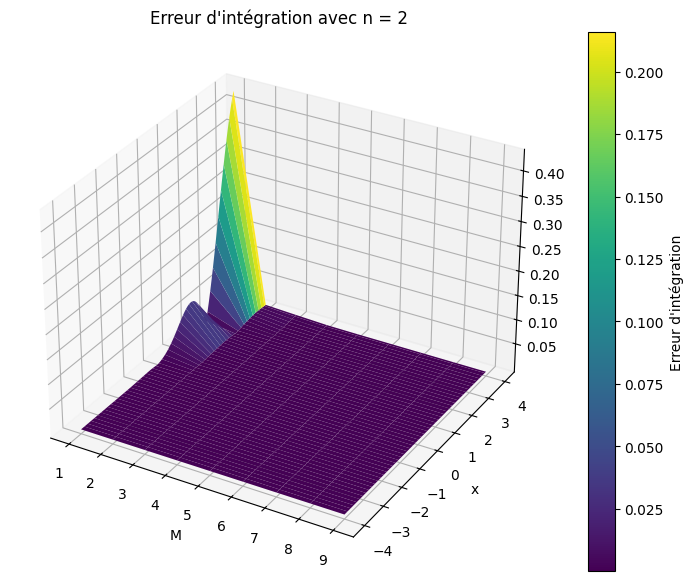

In [24]:
ns = np.arange(0,10,1)
A = np.linspace(-5,5,100)
M=2

X, Y = np.meshgrid(ns, A)

# Calculer les valeurs de f(x, y) pour chaque paire (x, y)
Z = np.zeros((len(A),len(ns)))
for i in range(len(A)):
    for j in range(len(ns)):
        Z[i, j] = abs(norm.cdf(Y[i,j])-gauss_legendre_vectorized(f_leg, X[i, j], M, -4, Y[i, j]))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


# Tracer la surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surf, label='Erreur d\'intégration')
ax.set_xlabel('n')
ax.set_ylabel('x')
plt.title('Erreur d\'intégration avec M = ' + str(M))  
plt.show()

#On fixe n et on fait varier M
Ms = np.arange(1,10,1)
A = np.linspace(-4,4,100)
n=2

X, Y = np.meshgrid(Ms, A)

# Calculer les valeurs de f(x, y) pour chaque paire (x, y)
Z = np.zeros((len(A),len(Ms)))
for i in range(len(A)):
    for j in range(len(Ms)):
        Z[i, j] = abs(norm.cdf(Y[i,j])-gauss_legendre_vectorized(f_leg, n, X[i, j], -4, Y[i, j]))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


# Tracer la surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surf, label='Erreur d\'intégration')
ax.set_xlabel('M')
ax.set_ylabel('x')
plt.title('Erreur d\'intégration avec n = ' + str(n))  
plt.show()

Pour conclure la méthode de quadrature de Gauss-Legendre est la plus optimale car c'est celle qui réduit le plus l'erreur. En particulier pour un nombre $n$ d'opération on trouver $n_1$ et $M$ tel que $n \approx M*n_1$, en faisant augmenter $M$ et en réduisant légérement $n_1$ on fait grandement diminuer l'erreur. De plus la stabilité ne dépend que du rang $n$ de la méthode donc et prenant un $n_1$ modéré un fait baisser le rang, on augmente la stabilité et on fait diminuer l'erreur.